# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [82]:
# conda activate pyvizenv

In [83]:
# imports
import pandas as pd
from pathlib import Path
import os

import hvplot.pandas

import panel as pn
pn.extension('plotly')
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [85]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data#.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [86]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_housing_units = sfo_data['housing_units'].groupby(by='year').mean()
mean_housing_units

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [87]:
# Save the dataframe as a csv file
mean_housing_units.to_csv('mean_housing_units.csv')

Text(0.5, 0, 'Year')

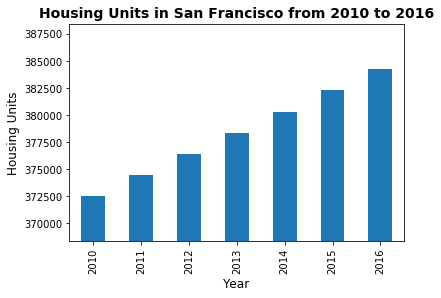

In [88]:
# Use the Pandas plot function to plot the average housing units per year.
ax1 = mean_housing_units.plot(x=('Year'),y='Housing Units',kind='bar')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
units_min = min(mean_housing_units)
units_max = max(mean_housing_units)
units_std = mean_housing_units.std()

ymin = units_min - units_std
ymax = units_max + units_std

ax1.set_ylim(ymin,ymax)

plt.title(label="Housing Units in San Francisco from 2010 to 2016",fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel("Housing Units", rotation=90,fontdict={'fontsize':12})
plt.xlabel("Year", fontdict={'fontsize':12})

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [89]:
# Calculate the average sale price per square foot and average gross rent
avg_sale_price_sqr_foot = sfo_data['sale_price_sqr_foot'].groupby(by='year').mean()
avg_gross_rent = sfo_data['gross_rent'].groupby(by='year').mean()

In [90]:

# Line chart for average sale price per square foot
# ax2 = avg_sale_price_sqr_foot.plot(x=('Year'),y='Price per SqFt',kind='line')
# ax2.set_xlim(2010,2016)



**Create two line charts**: 

    (1) average sale price per square foot
    (2) average montly rent

Text(0.5, 0, 'Year')

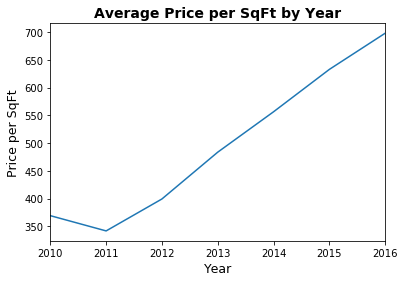

In [91]:
# average sale price per square foot by year
ax2 = avg_sale_price_sqr_foot.plot(kind='line')
ax2.set_xlim(2010,2016)
plt.title(label="Average Price per SqFt by Year",fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel("Price per SqFt", rotation=90,fontdict={'fontsize':12.5})
plt.xlabel("Year", fontdict={'fontsize':12.5})

Text(0, 0.5, 'Monthly Rent')

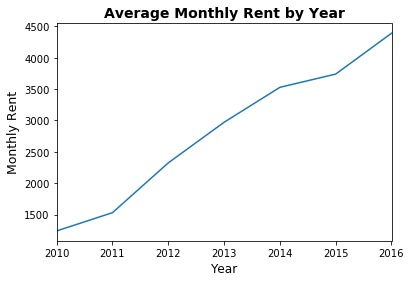

In [92]:
# average monthly rent by year
ax3 = avg_gross_rent.plot(kind='line')
ax3.set_xlim(2010,2016)
plt.title(label="Average Monthly Rent by Year",fontdict={'fontweight':'bold','fontsize':14})
plt.xlabel("Year", fontdict={'fontsize':12})
plt.ylabel("Monthly Rent", rotation=90, fontdict={'fontsize':12.5})

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [97]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


In [116]:
sfo_grp = (
#     sfo_data[["neighborhood","sale_price_sqr_foot","gross_rent"]]
    sfo_data[["neighborhood","sale_price_sqr_foot"]]
    
    .groupby([sfo_data.index,"neighborhood"])
    .mean()
    .reset_index()
)
sfo_grp

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623
...,...,...,...
392,2016,Telegraph Hill,903.049771
393,2016,Twin Peaks,970.085470
394,2016,Van Ness/ Civic Center,552.602567
395,2016,Visitacion Valley,328.319007


In [118]:
sfo_data.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel="year...?",
    ylabel="",
    groupby=["neighborhood","sale_price_sqr_foot"],
    width=300,
    height=300
)

AttributeError: 'DynamicMap' object has no attribute 'plot'

In [73]:
# sfo_data.reset_index(inplace=True)

In [81]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

# df_costs = sfo_data.groupby(['year','neighborhood'])
df_costs = (
    sfo_data.loc(axis=1)
    .groupby(["year","neighborhood"])
    .reset_index()
)
# neighborhood_sale_df = sfo_data.copy().drop(['housing_units','gross_rent'],axis=1)
# neighborhood_sale_df.set_index([neighborhood_sale_df.index,'neighborhood']
# neighborhood_sale_df.loc(axis=0)

# neighborhood_price_by_year = sfo_data['sale_price_sqr_foot'].groupby(by=['neighborhood','year']).mean()
# neighborhood_price_by_year
# sfo_data

AttributeError: '_LocIndexer' object has no attribute 'groupby'

In [21]:


# Group data by state and average total payments. and then sum

neighborhood_by_year = sfo_data[["Average Total Payments", "Provider State"]]
total_payment_by_state = payment_by_state.groupby("Provider State").sum()

# Plot data using hvplot.bar
total_payment_by_state.hvplot.bar()

KeyError: "None of [Index(['Average Total Payments', 'Provider State'], dtype='object')] are in the [columns]"

In [50]:
avg_sale_price_sqr_foot = sfo_data['sale_price_sqr_foot'].groupby(by='year').mean()
    
avg_sale_price_sqr_foot

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [51]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

In [ ]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [ ]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!

In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [ ]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

In [ ]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [ ]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!